# Logistic Regression and Binary Classification

## **Logistic Regression with PyTorch**

#### **Instructions**

In this question, you will implement a simple logistic regression model using PyTorch. Follow the steps below to generate a dataset, create data loaders, define the logistic regression model, train it, and evaluate its performance.

**Tasks:**

1. **Generate a Synthetic Dataset:**
   - Create a binary classification dataset with two features.
   - Use `make_classification` from `sklearn.datasets` to generate 1000 samples.
   - Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

2. **Develop Data Loaders:**
   - Convert the NumPy arrays to PyTorch tensors.
   - Create `TensorDataset` objects for training and testing data.
   - Initialize `DataLoader` instances for batching.

3. **Define the Logistic Regression Model:**
   - Create a PyTorch `nn.Module` class for logistic regression.
   - The model should consist of a single linear layer followed by a sigmoid activation.

4. **Train the Model:**
   - Define a loss function (`BCELoss`) and an optimizer (`SGD`).
   - Train the model for a specified number of epochs.
   - Record and print the training and testing loss after each epoch.

5. **Evaluate Performance:**
   - After training, evaluate the model's performance on both training and testing datasets by printing the final loss values.

In [12]:
# Import necessary libraries
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate Synthetic Dataset
X, y = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Develop Data Loaders
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Initialize DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)
    
# Define the Logistic Regression Model with more layers
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear1 = nn.Linear(input_dim, 10) # Increased the number of hidden nodes to 10 from 1
        # Initialize any additional layers if necessary
        self.relu = nn.ReLU() # Added a ReLU activation function
        self.linear2 = nn.Linear(10, 1) # Added a second linear layer
        self.logistic = nn.Sigmoid() # Added a sigmoid activation function

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.logistic(out)
        return out

# Initialize the model
input_dim = X_train.shape[1]
model = LogisticRegressionModel(input_dim)

# Train the Model
# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate on training data
    model.eval()
    with torch.no_grad():
        train_losses = []
        for batch_X, batch_y in train_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            train_losses.append(loss.item())
        avg_train_loss = sum(train_losses) / len(train_losses)

        # Evaluate on testing data
        test_losses = []
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            test_losses.append(loss.item())
        avg_test_loss = sum(test_losses) / len(test_losses)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Test Loss: {avg_test_loss:.4f}')

# Final Evaluation
print('Training and testing completed.')
print(f'Final Training Loss: {avg_train_loss:.4f}')
print(f'Final Testing Loss: {avg_test_loss:.4f}')

Epoch [10/100], Train Loss: 0.4070, Test Loss: 0.4262
Epoch [20/100], Train Loss: 0.3105, Test Loss: 0.3345
Epoch [30/100], Train Loss: 0.2719, Test Loss: 0.2984
Epoch [40/100], Train Loss: 0.2541, Test Loss: 0.2826
Epoch [50/100], Train Loss: 0.2427, Test Loss: 0.2725
Epoch [60/100], Train Loss: 0.2344, Test Loss: 0.2648
Epoch [70/100], Train Loss: 0.2270, Test Loss: 0.2582
Epoch [80/100], Train Loss: 0.2210, Test Loss: 0.2516
Epoch [90/100], Train Loss: 0.2163, Test Loss: 0.2472
Epoch [100/100], Train Loss: 0.2124, Test Loss: 0.2438
Training and testing completed.
Final Training Loss: 0.2124
Final Testing Loss: 0.2438


## **Cross Entropy Loss with PyTorch**

#### **Instructions**

In this question, you will implement a multi-class classification model using PyTorch. The goal is to understand how cross entropy loss functions in a scenario with three classes and how training the model maximizes the likelihood for the correct class. You will create a synthetic dataset, develop data loaders, define a neural network model, train it using cross entropy loss, and evaluate its performance.

**Tasks:**

1. **Generate a Synthetic Dataset:**
   - Create a multi-class classification dataset with three classes and two features.
   - Use `make_classification` from `sklearn.datasets` to generate 1500 samples.
   - Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

2. **Develop Data Loaders:**
   - Convert the NumPy arrays to PyTorch tensors.
   - Ensure that the labels are of the correct type for multi-class classification.
   - Create `TensorDataset` objects for training and testing data.
   - Initialize `DataLoader` instances for batching.

3. **Define the Neural Network Model:**
   - Create a PyTorch `nn.Module` class for the model.
   - The model should consist of a single linear layer that maps input features to three output classes.
   - Do not apply any activation function in the final layer since `CrossEntropyLoss` applies `LogSoftmax` internally.

4. **Train the Model:**
   - Define a loss function (`CrossEntropyLoss`) and an optimizer (`SGD` or `Adam`).
   - Train the model for a specified number of epochs.
   - After each epoch, compute and print the average training and testing loss.

5. **Evaluate Performance:**
   - After training, print the final training and testing loss values to assess the model's performance.
   - Optionally, you can extend the evaluation to include accuracy metrics.


In [15]:
# Import necessary libraries
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate Synthetic Dataset
X, y = make_classification(n_samples=1500, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=3, n_clusters_per_class=1, random_state=42)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Develop Data Loaders
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Ensure labels are of correct type
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)    # Ensure labels are of correct type

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Initialize DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define the Neural Network Model
class MulticlassClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MulticlassClassifier, self).__init__()
        # Define a linear layer mapping input_dim to num_classes
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        # Forward pass without activation
        out = self.linear(x)
        return out

# Initialize the model
input_dim = X_train.shape[1]
num_classes = 3
model = MulticlassClassifier(input_dim, num_classes)

# Train the Model
# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # or torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate on training data
    model.eval()
    with torch.no_grad():
        train_losses = []
        for batch_X, batch_y in train_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            train_losses.append(loss.item())
        avg_train_loss = sum(train_losses) / len(train_losses)

        # Evaluate on testing data
        test_losses = []
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            test_losses.append(loss.item())
        avg_test_loss = sum(test_losses) / len(test_losses)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Test Loss: {avg_test_loss:.4f}')
    
    # Accuracy Metrics
    if (epoch+1) == num_epochs:
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                outputs = model(batch_X)
                _, predicted = torch.max(outputs, dim=1)
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()
        print(f'Accuracy: {100 * correct / total}')

# Final Evaluation
print('Training and testing completed.')
print(f'Final Training Loss: {avg_train_loss:.4f}')
print(f'Final Testing Loss: {avg_test_loss:.4f}')

Epoch [10/100], Train Loss: 0.4849, Test Loss: 0.5136
Epoch [20/100], Train Loss: 0.3949, Test Loss: 0.4335
Epoch [30/100], Train Loss: 0.3623, Test Loss: 0.4034
Epoch [40/100], Train Loss: 0.3401, Test Loss: 0.3880
Epoch [50/100], Train Loss: 0.3340, Test Loss: 0.3788
Epoch [60/100], Train Loss: 0.3228, Test Loss: 0.3729
Epoch [70/100], Train Loss: 0.3178, Test Loss: 0.3685
Epoch [80/100], Train Loss: 0.3118, Test Loss: 0.3654
Epoch [90/100], Train Loss: 0.3093, Test Loss: 0.3627
Epoch [100/100], Train Loss: 0.3056, Test Loss: 0.3607
Accuracy: 86.0
Training and testing completed.
Final Training Loss: 0.3056
Final Testing Loss: 0.3607


## **Confusion Matrix and Performance Metrics in Binary Classification with PyTorch**

#### **Instructions**

In this homework, you will implement a binary classification model using PyTorch and evaluate its performance using various metrics related to the confusion matrix, including True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN), Precision, Recall, F1 Score, Receiver Operating Characteristic (ROC), and Area Under the Curve (AUC). This exercise will help you understand how these metrics provide insights into your model's performance beyond simple accuracy.

**Tasks:**

1. **Generate a Synthetic Dataset:**
   - Create a binary classification dataset with two features.
   - Use `make_classification` from `sklearn.datasets` to generate 1000 samples.
   - Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

2. **Develop Data Loaders:**
   - Convert the NumPy arrays to PyTorch tensors.
   - Create `TensorDataset` objects for training and testing data.
   - Initialize `DataLoader` instances for batching.

3. **Define the Binary Classification Model:**
   - Create a PyTorch `nn.Module` class for the model.
   - The model should consist of a single linear layer followed by a sigmoid activation function.

4. **Train the Model:**
   - Define a loss function (`BCELoss`) and an optimizer (`SGD` or `Adam`).
   - Train the model for a specified number of epochs.
   - Record the training loss after each epoch.

5. **Evaluate Performance Using Confusion Matrix Metrics:**
   - Use the `torchmetrics` library to compute TP, TN, FP, FN, Precision, Recall, F1 Score, ROC, and AUC.
   - Plot the ROC curve.
   - Print out all the computed metrics to assess the model's performance comprehensively.

6. **Ensure Reproducibility and Code Clarity:**
   - Set random seeds for reproducibility.
   - Organize and comment your code for clarity.

**Note:** You may need to install the `torchmetrics` library if it's not already installed. You can install it using pip:

```bash
pip install torchmetrics
```

Epoch [10/50], Loss: 0.3733
Epoch [20/50], Loss: 0.3661
Epoch [30/50], Loss: 0.3650
Epoch [40/50], Loss: 0.3649
Epoch [50/50], Loss: 0.3640
Confusion Matrix:
tensor([[85,  7],
        [15, 93]])
Precision: 0.9300
Recall: 0.8611
F1 Score: 0.8942
AUC: 0.9338


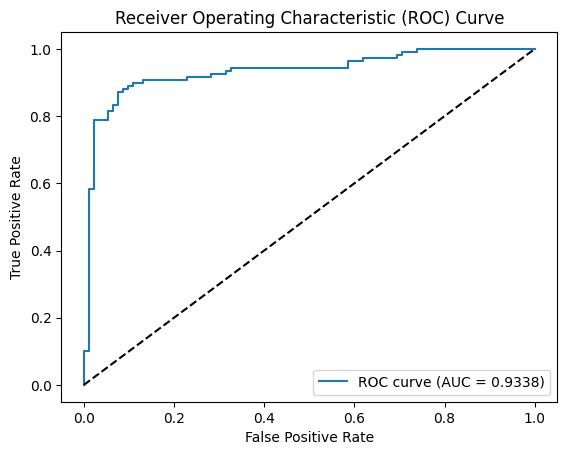

Performance Metrics:
True Positives (TP): 93
True Negatives (TN): 85
False Positives (FP): 7
False Negatives (FN): 15
Precision: 0.9300
Recall: 0.8611
F1 Score: 0.8942
AUC: 0.9338


In [20]:
# Import necessary libraries
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import torchmetrics
import matplotlib.pyplot as plt
import numpy as np
import random

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Generate Synthetic Dataset
X, y = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, random_state=42)
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Develop Data Loaders
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Initialize DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define the Binary Classification Model
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        # Define a linear layer that maps input_dim to 1 output
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        # Apply linear layer followed by sigmoid activation
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out

# Initialize the model
input_dim = X_train.shape[1]
model = BinaryClassifier(input_dim)

# Train the Model
# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    epoch_losses = []
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.item())

    avg_loss = sum(epoch_losses) / len(epoch_losses)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Evaluate Performance Using Confusion Matrix Metrics
# Initialize torchmetrics for confusion matrix metrics
from torchmetrics import ConfusionMatrix, Precision, Recall, F1Score, ROC, AUROC

# Update metric definitions with the 'task' argument for binary classification
confmat = ConfusionMatrix(task='binary')
precision = Precision(task='binary')
recall = Recall(task='binary')
f1 = F1Score(task='binary')
roc = ROC(task='binary')
auroc = AUROC(task='binary')

model.eval()
all_preds = []
all_probs = []
all_targets = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        probs = outputs.squeeze()
        preds = (outputs >= 0.5).long().squeeze()
        all_probs.append(probs)
        all_preds.append(preds)
        all_targets.append(batch_y.squeeze().long())

# Concatenate all batches
all_preds = torch.cat(all_preds)
all_probs = torch.cat(all_probs)
all_targets = torch.cat(all_targets)

# Compute confusion matrix
cm = confmat(all_preds, all_targets)
print('Confusion Matrix:')
print(cm)

# Compute precision, recall, F1 score
prec = precision(all_preds, all_targets)
rec = recall(all_preds, all_targets)
f1_score = f1(all_preds, all_targets)
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc(all_probs, all_targets)
auc = auroc(all_probs, all_targets)
print(f'AUC: {auc:.4f}')

# Plot ROC curve
plt.figure()
plt.plot(fpr.numpy(), tpr.numpy(), label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 6. Final Evaluation
print('Performance Metrics:')
print(f'True Positives (TP): {cm[1,1].item()}')
print(f'True Negatives (TN): {cm[0,0].item()}')
print(f'False Positives (FP): {cm[0,1].item()}')
print(f'False Negatives (FN): {cm[1,0].item()}')
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'AUC: {auc:.4f}')

## **MNIST Classification Using a Linear Neural Network in PyTorch**

In this question, you will implement a neural network using PyTorch to classify handwritten digits from the MNIST dataset. Unlike convolutional neural networks (CNNs), which are typically used for image data, you will use a simple neural network composed solely of linear (fully connected) layers. This exercise will help you understand how to handle image data with non-convolutional architectures and evaluate the performance of your model.

**Tasks:**

1. **Load and Preprocess the MNIST Dataset:**
   - Use `torchvision.datasets` to download and load the MNIST dataset.
   - Apply necessary transformations to convert images to tensors and normalize them.
   - Split the dataset into training and testing sets using `DataLoader`.

2. **Define the Linear Neural Network Model:**
   - Create a PyTorch `nn.Module` class for the model.
   - The model should consist of one or more linear layers with activation functions (e.g., ReLU).
   - The final layer should output logits corresponding to the 10 digit classes (0-9).

3. **Train the Model:**
   - Define a loss function (`CrossEntropyLoss`) suitable for multi-class classification.
   - Choose an optimizer (`SGD` or `Adam`) to update the model's weights.
   - Train the model for a specified number of epochs, recording the training loss and accuracy.

4. **Evaluate the Model:**
   - After training, evaluate the model's performance on the testing dataset.
   - Compute and print metrics such as accuracy, precision, recall, and F1 score.
   - Optionally, visualize some predictions alongside the true labels.

5. **Ensure Reproducibility and Code Clarity:**
   - Set random seeds for reproducibility.
   - Organize and comment your code for clarity.

**Note:** You may need to install the `torchvision` library if it's not already installed. You can install it using pip:

```bash
pip install torchvision
```

Epoch [1/10], Loss: 0.2584, Accuracy: 92.43%
Epoch [2/10], Loss: 0.1125, Accuracy: 96.63%
Epoch [3/10], Loss: 0.0769, Accuracy: 97.63%
Epoch [4/10], Loss: 0.0597, Accuracy: 98.15%
Epoch [5/10], Loss: 0.0468, Accuracy: 98.53%
Epoch [6/10], Loss: 0.0375, Accuracy: 98.81%
Epoch [7/10], Loss: 0.0304, Accuracy: 98.99%
Epoch [8/10], Loss: 0.0276, Accuracy: 99.09%
Epoch [9/10], Loss: 0.0214, Accuracy: 99.30%
Epoch [10/10], Loss: 0.0209, Accuracy: 99.28%
Test Accuracy: 97.83%


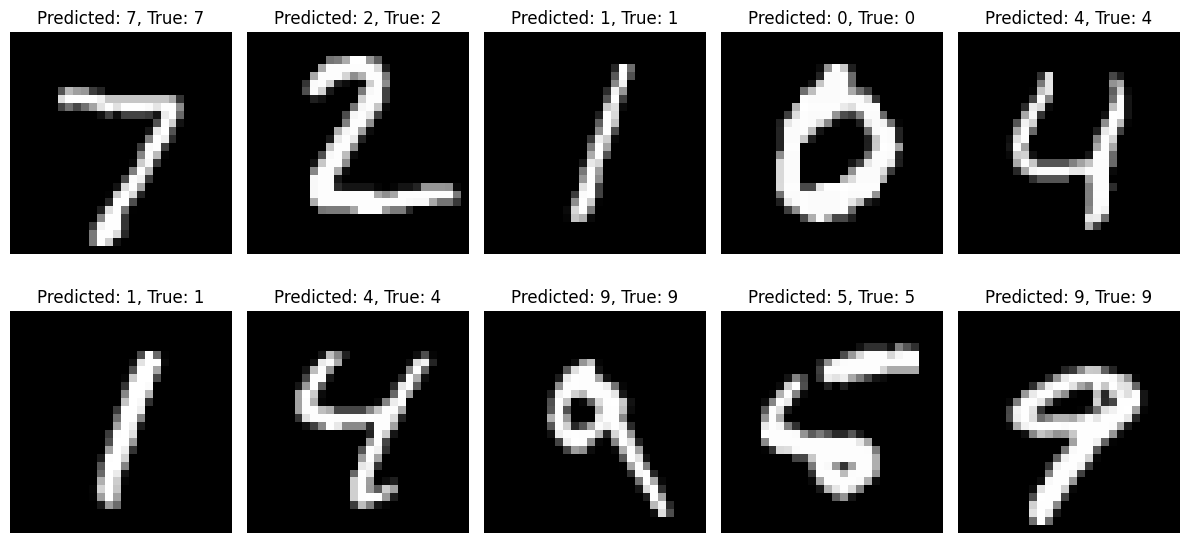

In [21]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import random

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Load and Preprocess the MNIST Dataset
# Define transformations: convert images to tensors and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Download and load the testing dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Define the Linear Neural Network Model
class LinearNet(nn.Module):
    def __init__(self):
        super(LinearNet, self).__init__()
        # Define the first linear layer that flattens the input image
        self.flatten = nn.Flatten()
        # Define a linear layer mapping input features to hidden units
        self.fc1 = nn.Linear(28*28, 128)
        # Define an activation function
        self.relu = nn.ReLU()
        # Define the output linear layer mapping to 10 classes
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Implement the forward pass
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model
model = LinearNet()

# Train the Model
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average loss and accuracy
    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

# Evaluate the Model
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Calculate test accuracy
test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Optional: Visualize some predictions
# Plot the first 10 test images with their predicted and true labels
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for i in range(10):
    img, label = test_dataset[i]
    img = img.numpy().squeeze()
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Predicted: {all_preds[i]}, True: {all_labels[i]}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()